In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [42]:
arff_data = arff.loadarff('heartdata.arff')
df = pd.DataFrame(arff_data[0])

df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,32.0,1.0,1.0,95.0,0.0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1.0
1,34.0,1.0,4.0,115.0,0.0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1.0
2,35.0,1.0,4.0,NaN,0.0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3.0
3,36.0,1.0,4.0,110.0,0.0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1.0
4,38.0,0.0,4.0,105.0,0.0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       617 non-null    float64
 1   gender    617 non-null    float64
 2   cp        617 non-null    float64
 3   trestbps  558 non-null    float64
 4   chol      587 non-null    float64
 5   fbs       527 non-null    float64
 6   restecg   615 non-null    float64
 7   thalach   562 non-null    float64
 8   exang     562 non-null    float64
 9   oldpeak   555 non-null    float64
 10  slope     308 non-null    float64
 11  ca        10 non-null     float64
 12  thal      133 non-null    float64
 13  class     617 non-null    float64
dtypes: float64(14)
memory usage: 67.6 KB


In [44]:
df.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,617.000000,617.000000,617.000000,558.000000,587.000000,527.000000,615.000000,562.000000,562.000000,555.000000,308.000000,10.000000,133.000000,617.000000
mean,53.055105,0.842788,3.294976,132.372760,174.579216,0.176471,0.414634,131.042705,0.423488,0.790991,1.938312,0.800000,5.887218,1.024311
std,9.582869,0.364296,0.913743,19.828097,124.349962,0.381582,0.611066,25.151341,0.494551,1.041776,0.575923,0.918937,1.612706,1.097988
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,114.250000,0.000000,0.000000,2.000000,0.000000,6.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,214.000000,0.000000,0.000000,130.000000,0.000000,0.000000,2.000000,0.500000,7.000000,1.000000
75%,60.000000,1.000000,4.000000,142.000000,263.000000,0.000000,1.000000,150.000000,1.000000,1.500000,2.000000,1.750000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,2.000000,7.000000,4.000000


#Missing Value Ratio

In [5]:
MVR = df.isnull().sum()/len(df)*100

variables = df.columns
variable = []

for i in range(df.columns.shape[0]):
 if MVR[i] <= 25:
  variable.append(variables[i])

df = df[variable]

df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,class
0,32.0,1.0,1.0,95.0,0.0,NaN,0.0,127.0,0.0,0.7,1.0
1,34.0,1.0,4.0,115.0,0.0,NaN,NaN,154.0,0.0,0.2,1.0
2,35.0,1.0,4.0,NaN,0.0,NaN,0.0,130.0,1.0,NaN,3.0
3,36.0,1.0,4.0,110.0,0.0,NaN,0.0,125.0,1.0,1.0,1.0
4,38.0,0.0,4.0,105.0,0.0,NaN,0.0,166.0,0.0,2.8,2.0


#Preprocessing

In [6]:
df.isnull().sum()

age          0
gender       0
cp           0
trestbps    59
chol        30
fbs         90
restecg      2
thalach     55
exang       55
oldpeak     62
class        0
dtype: int64

In [7]:
df['chol'] = df['chol'].fillna(df['chol'].mean())
df['thalach'] = df['thalach'].fillna(df['thalach'].mean())
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())

df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mode()[0])

df.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
class       0
dtype: int64

##Normalizing

In [8]:
def apply_min_max_scale(df, feature_name):
 df[feature_name] = preprocessing.minmax_scale(df[feature_name])
 
 return df

In [11]:
df = apply_min_max_scale(df, 'age')

In [12]:
df = apply_min_max_scale(df, 'trestbps')

In [13]:
df = apply_min_max_scale(df, 'chol')

In [14]:
df = apply_min_max_scale(df, 'thalach')

In [15]:
df = apply_min_max_scale(df, 'oldpeak')

In [17]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,class
0,0.081633,1.0,1.0,0.475000,0.0,0.0,0.0,0.515385,0.0,0.434211,1.0
1,0.122449,1.0,4.0,0.575000,0.0,0.0,0.0,0.723077,0.0,0.368421,1.0
2,0.142857,1.0,4.0,0.661864,0.0,0.0,0.0,0.538462,1.0,0.342105,3.0
3,0.163265,1.0,4.0,0.550000,0.0,0.0,0.0,0.500000,1.0,0.473684,1.0
4,0.204082,0.0,4.0,0.525000,0.0,0.0,0.0,0.815385,0.0,0.710526,2.0


##Correlation

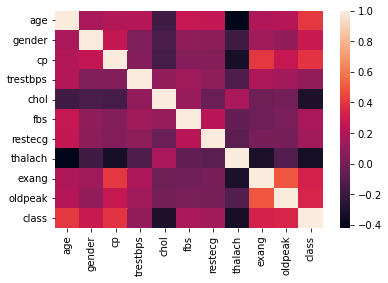

In [16]:
sns.heatmap(df.corr())

#Random Forest fire Feature Selection

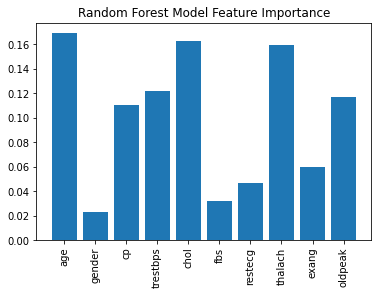

In [19]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x = df.drop(columns=['class']).values
y = df['class'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

model = RandomForestClassifier()
model.fit(X_train, y_train)

features = ['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak']
feature_df = pd.DataFrame({"Importance": model.feature_importances_, "Features": features})

plt.bar(feature_df["Features"], feature_df["Importance"])
plt.xticks(rotation = 90)
plt.title("Random Forest Model Feature Importance")
plt.show()

#Clustering

In [20]:
def apply_kmeans(data):
  sse, iterations, silhut_coefficient = [], [], []

  for k in range(2, 15):
    km = KMeans(n_clusters = k)
    km.fit(data)
    
    sse.append(km.inertia_)
    iterations.append(km.n_iter_)
    silhut_coefficient.append(silhouette_score(data, km.labels_))

  return sse, iterations, silhut_coefficient

##For complete dataset

In [21]:
dropped_data = df.drop(columns = ['gender', 'fbs', 'restecg', 'exang'])

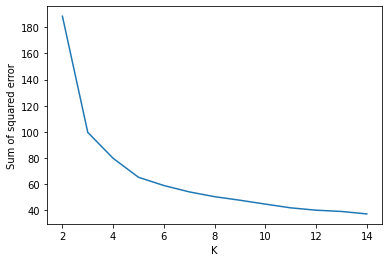

In [22]:
sse, iterations, silhut_coefficient = apply_kmeans(dropped_data.drop(columns = ['class']))

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(2, 15), sse)

In [23]:
sse, iterations, silhut_coefficient

([188.3927039908599,
  99.54797819233596,
  79.74036009349675,
  65.22697127561842,
  58.93279740040781,
  54.06651401495435,
  50.40769051580118,
  47.688919210204986,
  44.72116645178771,
  41.861891048702034,
  40.06753314660361,
  39.09880223108395,
  37.21840217128283],
 [5, 2, 4, 5, 9, 23, 32, 17, 26, 10, 9, 12, 13],
 [0.5876075496267255,
  0.5581848450436714,
  0.5776895250321992,
  0.42622588092695385,
  0.4032811208769758,
  0.35338010456157515,
  0.283414709716452,
  0.27829717791850983,
  0.2584487223576991,
  0.25842430966087,
  0.25894830916596917,
  0.24743209107571768,
  0.2496277103595226])

# Subsets of data

## Chol & Thalch

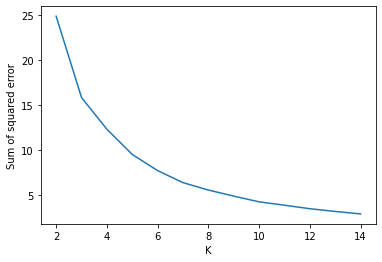

In [24]:
sse, iterations, silhut_coefficient = apply_kmeans(dropped_data[['chol', 'thalach']])

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(2, 15), sse)

In [25]:
sse, iterations, silhut_coefficient

([24.845102640519634,
  15.82747095150509,
  12.313764609318238,
  9.515211000471192,
  7.725676837063245,
  6.3916497632533975,
  5.569263822276222,
  4.8982125084618815,
  4.261243872417116,
  3.8875027516758234,
  3.4991752506218607,
  3.196870389142938,
  2.921914979562173],
 [5, 18, 5, 10, 10, 9, 10, 8, 15, 12, 16, 18, 9],
 [0.4927465564960994,
  0.436525139802421,
  0.41782089983393167,
  0.40299507856811767,
  0.4126754463373988,
  0.43218445676297257,
  0.39658031921243114,
  0.4063410851933064,
  0.4163708436183069,
  0.4093736959928851,
  0.4062317438457428,
  0.42311339079036997,
  0.4185820687035461])

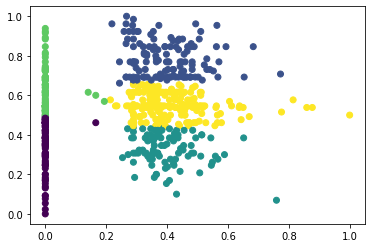

In [26]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(dropped_data[['chol', 'thalach']])

plt.scatter(dropped_data['chol'], dropped_data['thalach'], c=kmeans.labels_)
plt.show()

## Chol & Age

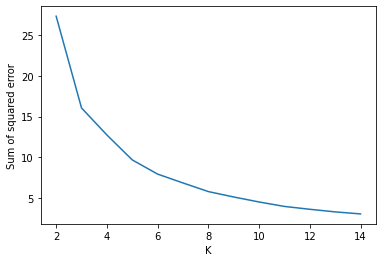

In [27]:
sse, iterations, silhut_coefficient = apply_kmeans(dropped_data[['chol', 'age']])

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(2, 15), sse)

In [28]:
sse, iterations, silhut_coefficient

([27.313751056452485,
  16.05330248668229,
  12.738065213949083,
  9.679097262709531,
  7.9350504083812154,
  6.850207693452755,
  5.791306879137771,
  5.127099479881107,
  4.515268286245906,
  3.9679824412525595,
  3.618965048209885,
  3.2984427992456324,
  3.0492732474222852],
 [20, 5, 7, 10, 7, 13, 10, 23, 18, 19, 34, 16, 20],
 [0.4763368096668448,
  0.4623145584191547,
  0.4495232889301345,
  0.41960102011936257,
  0.436227867807578,
  0.4062296460261272,
  0.4118767930099512,
  0.41226279233994734,
  0.4181774105740914,
  0.4240297024829746,
  0.4201762904642492,
  0.40657519498482075,
  0.40534554394396577])

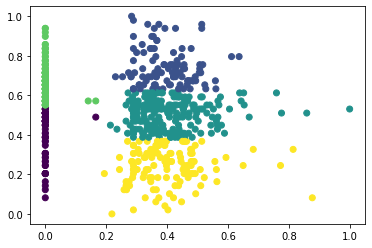

In [29]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(dropped_data[['chol', 'age']])

plt.scatter(dropped_data['chol'], dropped_data['age'], c=kmeans.labels_)
plt.show()

#Regression

In [30]:
dropped_data.loc[(dropped_data['class'] < 1), 'class'] = 0
dropped_data.loc[(dropped_data['class'] >= 1), 'class'] = 1

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def apply_regression_and_plot(X, Y, x, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

  scx = StandardScaler()
  x_train = scx.fit_transform(x_train)
  x_test = scx.transform(x_test)

  classifier = LogisticRegression(random_state = 0)
  classifier.fit(x_train, y_train)

  y_pred = classifier.predict(x_test)

  cm = confusion_matrix(y_test, y_pred)

  ax = sns.heatmap(cm, annot = True, cmap = 'BuPu')
  ax.set_xlabel('Prediction')
  ax.set_ylabel('Actual')
  plt.show()
  
  print ("Accuracy :", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


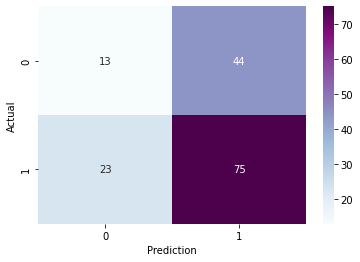

Accuracy : 0.567741935483871


In [33]:
X, Y = dropped_data.iloc[:, 3].values, dropped_data.iloc[:, 6].values
apply_regression_and_plot(X, Y, np.array(X).reshape(-1, 1), np.array(Y).reshape(-1, 1))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


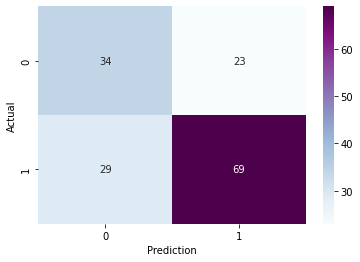

Accuracy : 0.6645161290322581


In [34]:
X, Y = dropped_data.iloc[:, [0, 2, 3]].values, dropped_data.iloc[:, 6].values
apply_regression_and_plot(X, Y, np.array(X).reshape(-1, 3), np.array(Y).reshape(-1, 1))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


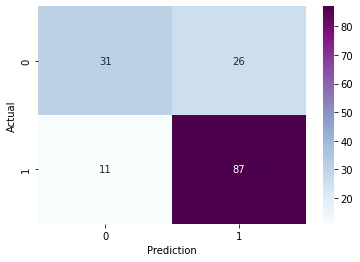

Accuracy : 0.7612903225806451


In [40]:
X, Y = dropped_data.iloc[:, [0, 2, 3, 4]].values, dropped_data.iloc[:, 6].values
apply_regression_and_plot(X, Y, np.array(X).reshape(-1, 4), np.array(Y).reshape(-1, 1))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


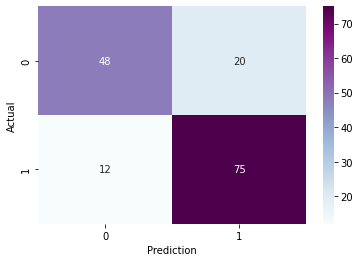

Accuracy : 0.7935483870967742


In [35]:
X, Y = dropped_data.iloc[:, [0, 1, 2, 3]].values, dropped_data.iloc[:, 6].values
apply_regression_and_plot(X, Y, np.array(X).reshape(-1, 4), np.array(Y).reshape(-1, 1))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


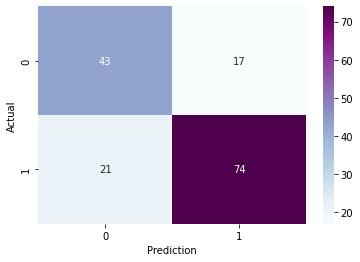

Accuracy : 0.7548387096774194


In [36]:
X, Y = dropped_data.iloc[:, [0, 1, 2, 3, 4, 5]].values, dropped_data.iloc[:, 6].values
apply_regression_and_plot(X, Y, np.array(X).reshape(-1, 6), np.array(Y).reshape(-1, 1))